# Summaries, Conclusions, and Recommendations

Below, I'll lay out some of the summaries of my testing and provide some recommendations for investors looking to generate a return.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
lasso_coefs = pd.read_csv('../datasets/coefs/lasso_coefs.csv')
ridge_coefs = pd.read_csv('../datasets/coefs/ridge_coefs.csv')
linreg_coefs = pd.read_csv('../datasets/coefs/lr_coefs.csv')
scaled_lr_coefs = pd.read_csv('../datasets/coefs/scaled_lr_coefs.csv')

### Summary of model scores

|            | **RMSE Score on Test Data (20% of original dataset)** | **RMSE Score on Kaggle Data** |
|------------|-----------------------------------------------------------|-------------------------------|
| **LinReg** |                 <center>17265.16</center>                 | <center>21166.21</center>     |
| **Ridge**  |                 <center>18031.37</center>                 | <center>21820.68</center>     |
| **Lasso**  |                 <center>18074.75</center>                 | <center>21619.87</center>     |

### Comparing Model Coefficients

In [3]:
def remove_uninterpretable_coefs(data):
    return data[(data['features'].str.contains(' x ') == False) &
                (data['features'].str.contains('log') == False) &
                (data['features'].str.contains('\^') == False) &
                (data['features'].str.contains('Exter Qual_TA') == False)]

In [4]:
def rename_column_unnamed0_to_features(data):
    return data.rename(columns={'Unnamed: 0' : 'features', 'Coefficients' : 'coefficients'})

In [5]:
def sort_columns(data, by='coefficients'):
    return data.sort_values(by=by)

In [6]:
def coef_column_clean(data):
    data = rename_column_unnamed0_to_features(data)
    data = remove_uninterpretable_coefs(data)
    data = sort_columns(data)
    return data

In [7]:
lasso_coefs_clean = coef_column_clean(lasso_coefs)
ridge_coefs_clean = coef_column_clean(ridge_coefs)
linreg_coefs_clean = coef_column_clean(linreg_coefs)
scaled_lr_coefs_clean = coef_column_clean(scaled_lr_coefs)

### Creating a df of the top 5 highest positive and negative correlations

In [8]:
lasso_best_worst = pd.concat([lasso_coefs_clean.head(), lasso_coefs_clean.tail()])

In [9]:
ridge_best_worst = pd.concat([ridge_coefs_clean.head(), ridge_coefs_clean.tail()])

In [10]:
linreg_best_worst = pd.concat([linreg_coefs_clean.head(), linreg_coefs_clean.tail()])

In [11]:
scaled_linreg_best_worst = pd.concat([scaled_lr_coefs_clean.head(), scaled_lr_coefs_clean.tail()])

In [12]:
def create_coef_plot(data, title, columns=['features', 'coefficients'], xlabel='Features', ylabel='Coefficient Values (in Dollars)', scale=[-15000, 15000]):
    plt.figure(figsize=(21,10))
    sns.set_style('darkgrid')
    sns.barplot(data[columns[0]], data[columns[1]], palette='RdBu')
    plt.ylim(scale[0], scale[1])
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=24)

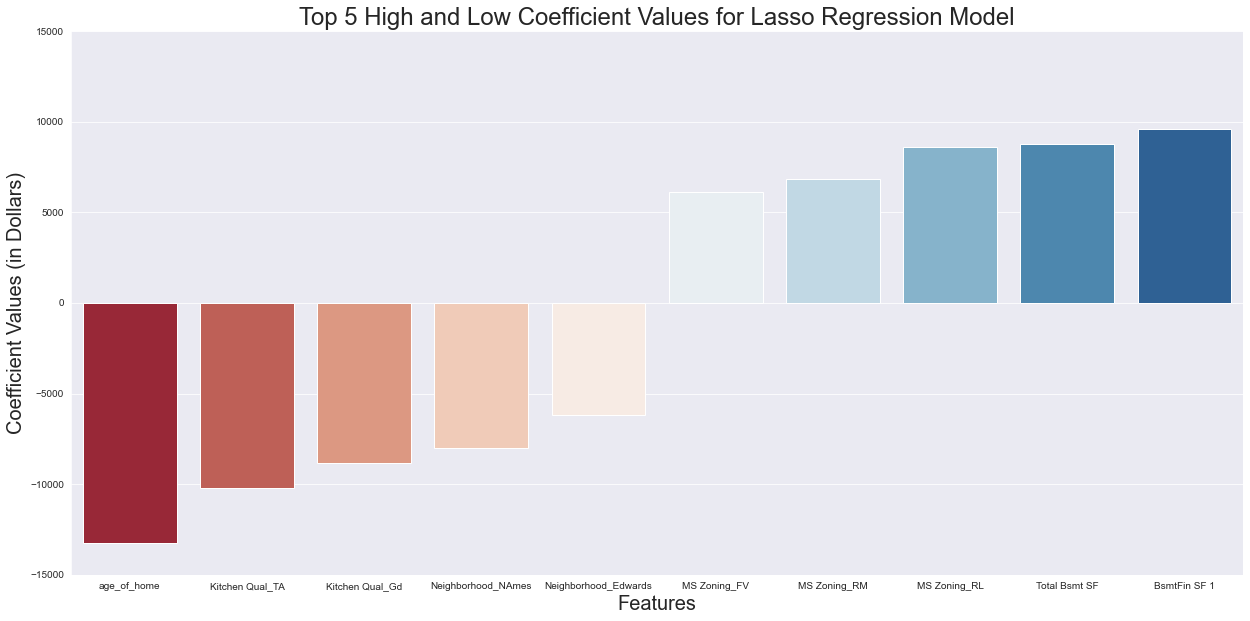

In [13]:
create_coef_plot(lasso_best_worst, 'Top 5 High and Low Coefficient Values for Lasso Regression Model')
plt.savefig('../images/coefs_lasso_reg');

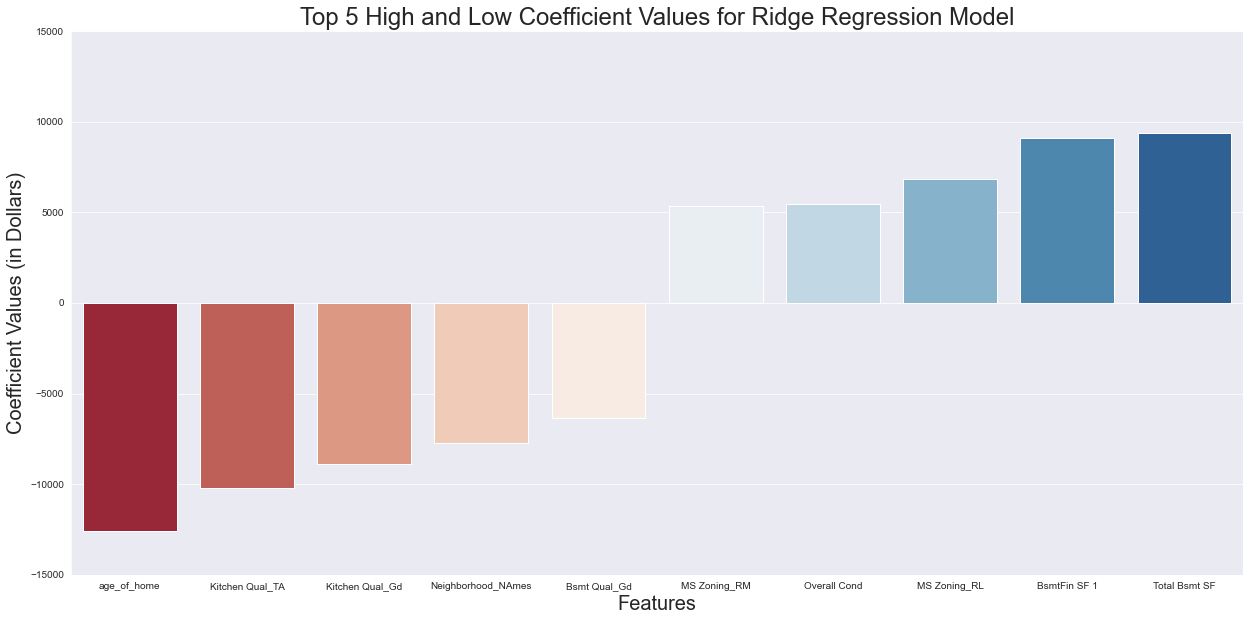

In [14]:
create_coef_plot(ridge_best_worst, 'Top 5 High and Low Coefficient Values for Ridge Regression Model')
plt.savefig('../images/coefs_ridge_reg');

In [15]:
# I need to get the top and bottom 5 features from the scaled linear regression model
features = scaled_linreg_best_worst.index 

In [16]:
# Now I want to see what the coefficients are for those in dollars by calling the features from the unscaled linear regression model
linreg_coefs_clean.loc[features] 

,features,coefficients
68,age_of_home,-440.073319
63,Kitchen Qual_TA,-17353.524491
31,Neighborhood_NAmes,-22477.006367
62,Kitchen Qual_Gd,-16072.641694
54,Bsmt Qual_Gd,-11528.716925
47,Sale Type_New,20169.970150
0,Overall Cond,5328.856646
12,MS Zoning_RL,15697.453140
4,Total Bsmt SF,19.312078
2,BsmtFin SF 1,21.700437


---
After running all the tests on the data, I've come to the following conclusions about the **best ways to improve a home's value**:
* **Remodel your kitchen!** When compared to a kitchen of Excellent quality, a good to poor kitchen may negatively impact your house value by ~16,000 dollars when all other variables are held equal.
* **Remodel your basement!** When all other values are held constant, a finished basement adds ~$21 per square foot to the value of your home.

When compared to the same house in Bloomington Heights, being located in North Ames may decrease the value of your home by ~22,477 dollars, this could be a good opportunity to find cheap property, but it's risky!

And some conclusions about the **models I ran**:
* The Lasso model seemed to perform the most consistently, though the many interaction terms made the results difficult to interpret literally. I was able to detect trends across the three models that led me to my conclusions.
* A simpler model with less features would sacrifice my model's performance for the sake of a clearer, actionable understanding of the correlation of features to sale price